In [1]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt , seaborn as sns
from sklearn import ensemble, metrics, compose, pipeline,impute,preprocessing

In [2]:
df = pd.read_csv('penguins.csv')
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

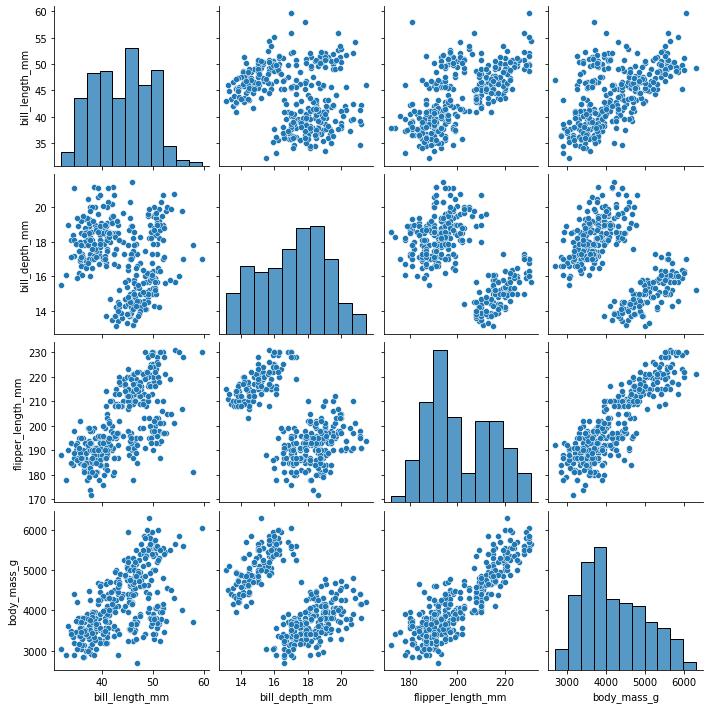

In [8]:
sns.pairplot(df)

In [9]:
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cat_cols = ['island','sex'] 

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())
# filling up the missing values in our data


In [10]:
new_df = pd.get_dummies(df, columns = cat_cols)

In [11]:
new_df.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.10,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.50,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.30,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,44.45,17.3,197.0,4050.0,0,0,1,0,0
4,Adelie,36.70,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.30,20.6,190.0,3650.0,0,0,1,0,1
6,Adelie,38.90,17.8,181.0,3625.0,0,0,1,1,0
7,Adelie,39.20,19.6,195.0,4675.0,0,0,1,0,1
8,Adelie,34.10,18.1,193.0,3475.0,0,0,1,0,0
9,Adelie,42.00,20.2,190.0,4250.0,0,0,1,0,0


In [12]:
new_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

<AxesSubplot:xlabel='island', ylabel='count'>

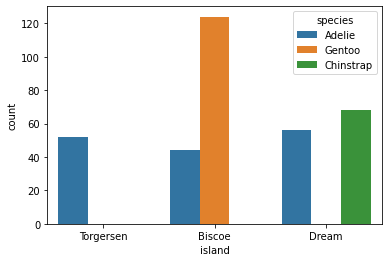

In [13]:
sns.countplot(data  = df, x='island',hue='species')

<AxesSubplot:xlabel='sex', ylabel='count'>

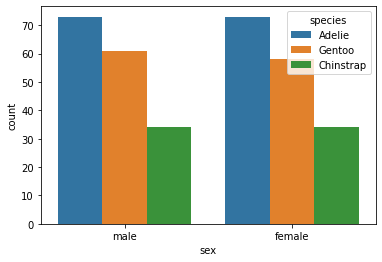

In [14]:
sns.countplot(data  = df, x='sex',hue='species')

In [15]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [16]:
new_df.species = new_df.species.astype('category')
new_df.species = new_df.species.cat.codes

Establishing a baseline model


In [17]:
from sklearn.model_selection import train_test_split
X = new_df.drop('species',axis = 1)
y= new_df.species


X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=20022, test_size = .2)


In [18]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
metrics.accuracy_score(y_test, preds)

1.0


We achieved perfect accuracy on our test data

Let's build out a pipeline for our model

In [19]:
numerical_preprocessor = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy = 'median') ),
    ('scaler', preprocessing.StandardScaler())
])

categorical_preprocessor = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy= 'most_frequent')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))
])

In [20]:
preprocessor = compose.ColumnTransformer([
    ('numerical_preprocessor',numerical_preprocessor,num_cols),
    ('categorical_preprocessor', categorical_preprocessor,cat_cols)
])

In [21]:
my_pipe = pipeline.Pipeline([
    ('all_preprocessing', preprocessor),
    ('model', ensemble.RandomForestClassifier()),
])

In [22]:
my_pipe.steps

[('all_preprocessing',
  ColumnTransformer(transformers=[('numerical_preprocessor',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', StandardScaler())]),
                                   ['bill_length_mm', 'bill_depth_mm',
                                    'flipper_length_mm', 'body_mass_g']),
                                  ('categorical_preprocessor',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('onehot',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   ['island', 'sex'])])),
 ('model', RandomForestClassifier())]

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('species',axis = 1)
y= df.species


X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=20022, test_size = .2)

In [25]:
my_pipe.fit(X_train,y_train)
pipe_preds = my_pipe.predict(X_test)
print(pipe_preds)

['Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie']


In [ ]:
# import joblib
# joblib.dump(my_pipe, 'pipeline.pkl')